In [1]:
# import dependencies
import pandas as pd
from apiKey import api_key
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


In [2]:
# pull data from csv
file_one = "Resources/highest_grossing_movies.csv"
df = pd.read_csv(file_one)
df.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [3]:
# create a list to loop through the top1000
titles = df['Title'].str[:-7].values.tolist()


In [4]:
df.columns

Index(['Unnamed: 0', 'Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License'],
      dtype='object')

In [5]:
# Interacting with the API
url = f'http://www.omdbapi.com/?apikey={api_key}&t='
# make a list to append json data
title = 'Star Wars: Episode VII - The Force Awakens'
rt_movies_ls = [] # we'll turn this into a data frame? 
imdb_movies_ls = []
director_ls = []
actor_ls = []
title_ls = []
year_ls = []
rated_ls = []
length_ls = []
movie_json = requests.get(url + title).json()
movie_json

# request limit is 1000 daily
# we need to cut list down to 100

{'Title': 'Star Wars: Episode VII - The Force Awakens',
 'Year': '2015',
 'Rated': 'PG-13',
 'Released': '18 Dec 2015',
 'Runtime': '138 min',
 'Genre': 'Action, Adventure, Sci-Fi',
 'Director': 'J.J. Abrams',
 'Writer': 'Lawrence Kasdan, J.J. Abrams, Michael Arndt',
 'Actors': 'Daisy Ridley, John Boyega, Oscar Isaac',
 'Plot': 'As a new threat to the galaxy rises, Rey, a desert scavenger, and Finn, an ex-stormtrooper, must join Han Solo and Chewbacca to search for the one hope of restoring peace.',
 'Language': 'English',
 'Country': 'United States',
 'Awards': 'Nominated for 5 Oscars. 64 wins & 139 nominations total',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BOTAzODEzNDAzMl5BMl5BanBnXkFtZTgwMDU1MTgzNzE@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.8/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '93%'},
  {'Source': 'Metacritic', 'Value': '80/100'}],
 'Metascore': '80',
 'imdbRating': '7.8',
 'imdbVotes': '936,253',
 'imdbID': 'tt2488496',


In [6]:
#
for title in titles[:500]:
    try:
        # access json data
        movie_json = requests.get(url + title).json()
        movie_ratings_rt = movie_json['Ratings'][1]['Value']
        movie_ratings_imdb = movie_json['imdbRating']
        movie_director = movie_json['Director']
        movie_actors = movie_json['Actors']
        movie_year = movie_json['Year']
        movie_rating = movie_json['Rated']
        movie_length = movie_json['Runtime']
        #append json to movie_ls list
        rt_movies_ls.append(movie_ratings_rt)
        imdb_movies_ls.append(movie_ratings_imdb)
        director_ls.append(movie_director)
        actor_ls.append(movie_actors)
        title_ls.append(title)
        year_ls.append(movie_year)
        rated_ls.append(movie_rating)
        length_ls.append(movie_length)
    except:
        pass
# convert movie list into data frame
movie_json

{'Title': 'Prometheus',
 'Year': '2012',
 'Rated': 'R',
 'Released': '08 Jun 2012',
 'Runtime': '124 min',
 'Genre': 'Adventure, Mystery, Sci-Fi',
 'Director': 'Ridley Scott',
 'Writer': "Jon Spaihts, Damon Lindelof, Dan O'Bannon",
 'Actors': 'Noomi Rapace, Logan Marshall-Green, Michael Fassbender',
 'Plot': 'Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.',
 'Language': 'English, Gaelic',
 'Country': 'United Kingdom, United States',
 'Awards': 'Nominated for 1 Oscar. 6 wins & 47 nominations total',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTY3NzIyNTA2NV5BMl5BanBnXkFtZTcwNzE2NjI4Nw@@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.0/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '73%'},
  {'Source': 'Metacritic', 'Value': '64/100'}],
 'Metascore': '64',
 'imdbRating': '7.0',
 'imdbVotes': '615,121',
 'imdbID': 'tt1446714',
 'Type': 'movie',
 'DVD': '09 Oct 2012',
 '

In [12]:


#print(title_ls[0])
#print(actor_ls[0])
#print(director_ls[0])

#print(year_ls[0])
#print(rt_movies_ls[0])
#print(imdb_movies_ls[0])




Star Wars: Episode VII - The Force Awakens
Daisy Ridley, John Boyega, Oscar Isaac
J.J. Abrams
2015
93%
7.8


In [7]:
full_moviels_df = pd.DataFrame()
full_moviels_df['Title'] = title_ls
full_moviels_df['World Sales'] = df['World Sales (in $)']
full_moviels_df['Year Released'] = year_ls
full_moviels_df['Rotten Tomatoes Score'] = rt_movies_ls
full_moviels_df['IMDB Score'] = imdb_movies_ls
full_moviels_df['Director(s)'] = director_ls
full_moviels_df['Headlining Actor(s)'] = actor_ls
full_moviels_df['Studio'] = df['Distributor']
full_moviels_df['Runtime'] = length_ls
full_moviels_df['Rating'] = rated_ls
full_moviels_df['Genre'] = df['Genre']
full_moviels_df.head()   

,Title,World Sales,Year Released,Rotten Tomatoes Score,IMDB Score,Director(s),Headlining Actor(s),Studio,Runtime,Rating,Genre
0,Star Wars: Episode VII - The Force Awakens,2069521700,2015,93%,7.8,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac",Walt Disney Studios Motion Pictures,138 min,PG-13,"['Action', 'Adventure', 'Sci-Fi']"
1,Avengers: Endgame,2797501328,2019,94%,8.4,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo",Walt Disney Studios Motion Pictures,181 min,PG-13,"['Action', 'Adventure', 'Drama', 'Sci-Fi']"
2,Avatar,2847246203,2009,82%,7.9,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",Twentieth Century Fox,162 min,PG-13,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']"
3,Black Panther,1347597973,2018,96%,7.3,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",Walt Disney Studios Motion Pictures,134 min,PG-13,"['Action', 'Adventure', 'Sci-Fi']"
4,Avengers: Infinity War,2048359754,2018,85%,8.4,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Hemsworth, Mark Ruffalo",Walt Disney Studios Motion Pictures,149 min,PG-13,"['Action', 'Adventure', 'Sci-Fi']"


In [10]:
full_moviels_df.to_csv("Output/Movie_Data.csv")

In [38]:
# convert movie list into data frame
#movie_list_df = pd.DataFrame(movies_ls)
#movie_list_df["Metacritic Rating"] = movie_list_df[2]['Value']
#movie_list_df

,0
0,93%
1,94%
2,82%
3,96%
4,85%


In [18]:
# merge dataframes

In [ ]:
# Bar Graphs on directors  sales, actors  sales,  studio sales,
# Combine list of actors into 1 large list to run a count of how many times an actor appears across all movies on list

#MK

In [ ]:
# Line plot for movie genre performance over time

#RM

In [8]:
# Count of movies per movie rated type
rate_count = full_moviels_df["Rating"].value_counts()
rate_count
#EP

PG-13       261
PG          127
R            80
G            27
Approved      1
18+           1
Name: Rating, dtype: int64

In [33]:
#DataFrame for Total sales from a rating
rated_and_sales = full_moviels_df.set_index(['Rating'])['World Sales']
rate_type_avg_sales = full_moviels_df.groupby(["Rating"]).mean()["World Sales"]
rate_type_sales_overall = full_moviels_df.groupby(["Rating"]).sum()["World Sales"]



type_summary=pd.DataFrame({
                          'Total Sales Per Type':rate_type_sales_overall,
                            })
type_summary
                                         

,Total Sales Per Type
Rating,
18+,354825435
Approved,184925486
G,16917497010
PG,67379279430
PG-13,157811622067
R,31030184041


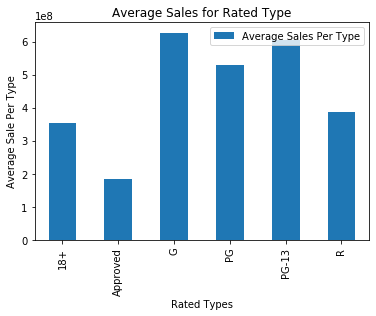

In [45]:
#Bar chart for Average sales per Rating type
rated_and_sales_avg = full_moviels_df.set_index(['Rating'])['World Sales']


avg_summary =pd.DataFrame({"Average Sales Per Type":rate_type_avg_sales})

Average_summary=avg_summary.plot.bar()
plt.xlabel("Rated Types")
plt.ylabel("Average Sale Per Type")
plt.title("Average Sales for Rated Type")
plt.savefig("Output/salesperratedtype.png")

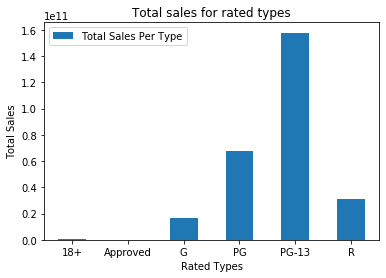

In [46]:
overall_sale_by_rate_type=type_summary.plot.bar()

plt.xlabel("Rated Types")
plt.ylabel("Total Sales")
plt.title("Total sales for rated types")
plt.xticks(rotation=360)
plt.savefig("Output/SalesOverall.png")

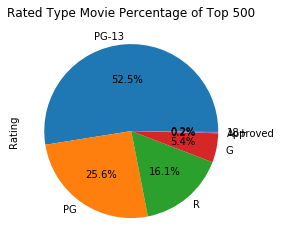

<Figure size 432x288 with 0 Axes>

In [47]:
#pie chart for percentage of rated type in top 500 EP
plt.title("Rated Type Movie Percentage of Top 500")
rate_count.plot.pie(autopct= "%1.1f%%")
plt.show()

plt.savefig("Output/RatePercentageof500.png")

In [ ]:
# Pie chart of Genre Percentage in top grossing

#DV

In [ ]:
# Scatter plot for audience reception vs. sales
# Scatter plot for critic reception vs. sales

#ET